In [4]:
## dataset downloading...
!unzip /home/neeyuhuynh/Music-Genre-Classification/archive.zip
!rm /home/neeyuhuynh/Music-Genre-Classification/archive.zip

Archive:  /home/neeyuhuynh/Music-Genre-Classification/archive.zip
  inflating: Data/features_30_sec.csv  
  inflating: Data/features_3_sec.csv  
  inflating: Data/genres_original/blues/blues.00000.wav  
  inflating: Data/genres_original/blues/blues.00001.wav  
  inflating: Data/genres_original/blues/blues.00002.wav  
  inflating: Data/genres_original/blues/blues.00003.wav  
  inflating: Data/genres_original/blues/blues.00004.wav  
  inflating: Data/genres_original/blues/blues.00005.wav  
  inflating: Data/genres_original/blues/blues.00006.wav  
  inflating: Data/genres_original/blues/blues.00007.wav  
  inflating: Data/genres_original/blues/blues.00008.wav  
  inflating: Data/genres_original/blues/blues.00009.wav  
  inflating: Data/genres_original/blues/blues.00010.wav  
  inflating: Data/genres_original/blues/blues.00011.wav  
  inflating: Data/genres_original/blues/blues.00012.wav  
  inflating: Data/genres_original/blues/blues.00013.wav  
  inflating: Data/genres_original/blues/blu

## Dataset description:
The dataset used is GTZAN (the famous GTZAN dataset, the MNIST of sounds)

The GTZAN dataset contains 1000 audio files. Contains a total of 10 genres, each genre contains 100 audio files

1. Blues

2. Classical

3. Country

4. Disco

5. Hip-hop

6. Jazz

7. Metal

8. Pop

9. Reggae

10. Rock

**Genres original**

> A compilation of ten genres, each with 100 audio recordings, each lasting 30 seconds (the famous GTZAN dataset, the MNIST of sounds)

**Images original**

> Each audio file has a visual representation. Neural networks are one technique to classify data because they usually take in some form of picture representation.

**CSV files**

> The audio files' features are contained within. Each song lasts for 30 seconds long has a mean and variance computed across several features taken from an audio file in one file. The songs are separated into 3 second audio files in the other file, which has the same format.

In [5]:
!rm -r /home/neeyuhuynh/Music-Genre-Classification/Data/images_original
!rm /home/neeyuhuynh/Music-Genre-Classification/Data/features_30_sec.csv
!rm /home/neeyuhuynh/Music-Genre-Classification/Data/features_3_sec.csv

In [6]:
!pip install librosa

  Using cached numba-0.60.0-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (2.7 kB)
  Using cached llvmlite-0.43.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.8 kB)
Using cached numba-0.60.0-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 3.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 3.6 MB/s eta 0:00:00a 0:00:01
Using cached llvmlite-0.43.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (43.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.1
    Uninstalling numpy-2.1.1:
      Successfully uninstalled numpy-2.1.1


In [7]:
data_path = "Data/genres_original/blues/blues.00000.wav"

In [8]:
import librosa

# Load a .wav file using librosa
data, sr = librosa.load(data_path) # Sampling rate = 22050

In [9]:
# Playing audio file
import IPython

IPython.display.Audio(data,rate=sr)

## Signal Processing Fundamental

### Wave form 

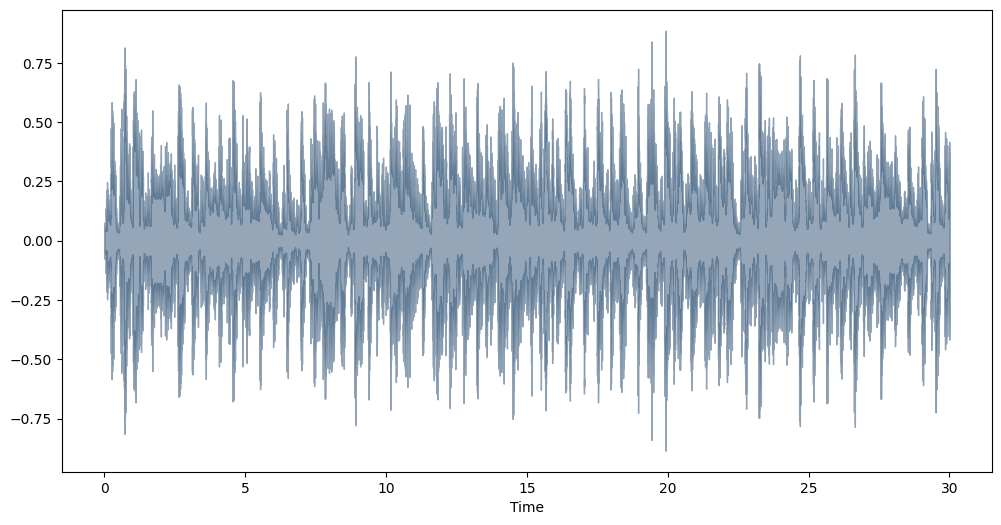

In [11]:
import matplotlib.pyplot as plt 

#Wave form of the audio
plt.figure(figsize=(12,6))
librosa.display.waveshow(data, color='#2B4F72', alpha = 0.5)
plt.show()

### Sampling rate 

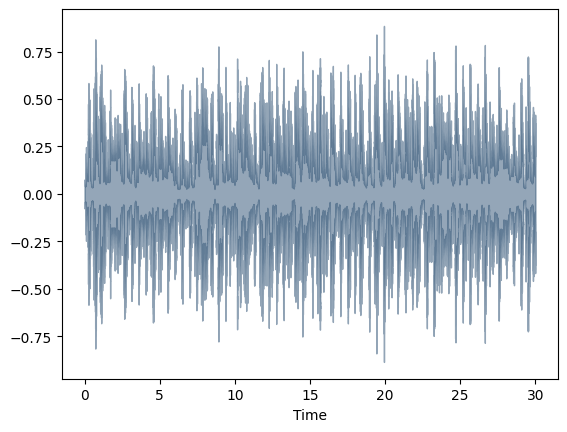

In [12]:
data, sr = librosa.load(data_path)
librosa.display.waveshow(data, color="#2B4F72", alpha=0.5)
plt.show()

In [14]:
import IPython.display


IPython.display.Audio(data, rate=sr)

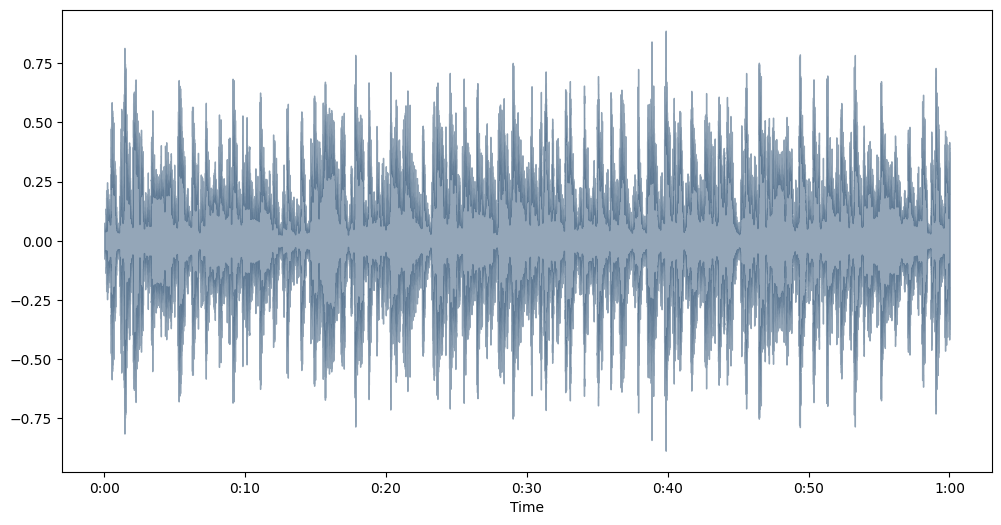

In [16]:
data, sr = librosa.load(data_path, sr=44100)

plt.figure(figsize=(12,6))
librosa.display.waveshow(data, color="#2B4F72", alpha = 0.5)
plt.show()

In [17]:
IPython.display.Audio(data,rate=sr)

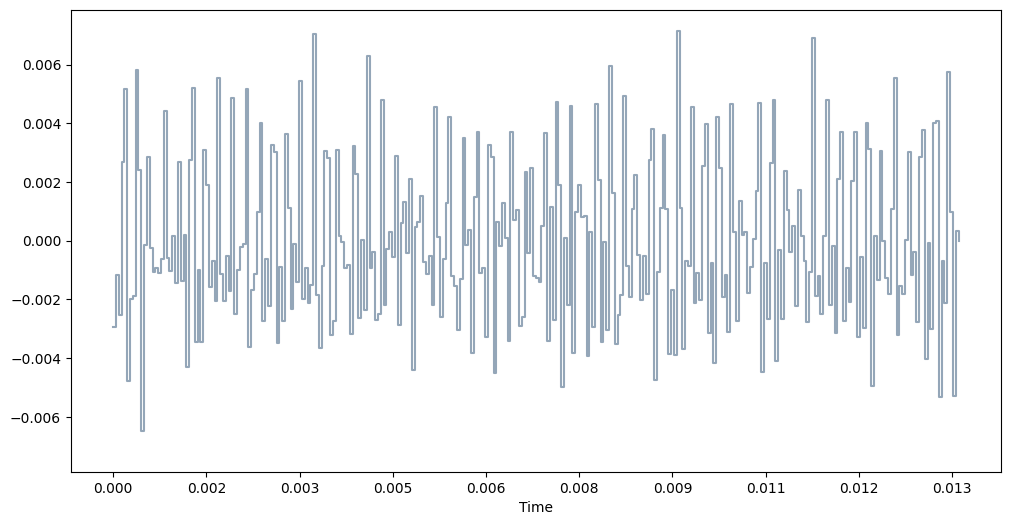

In [18]:
data, sr = librosa.load(data_path, sr=10)

plt.figure(figsize=(12,6))
librosa.display.waveshow(data, color="#2B4F72", alpha = 0.5)
plt.show()

In [19]:
IPython.display.Audio(data,rate=sr)

***Where Has the Sound Gone?***

The sound has become inaudible to us because its frequency has dropped below the human hearing threshold, which starts at 20Hz. This means that the sound's frequency is now outside the range that the human ear can detect and interpret.

> **A waveform is a one-dimensional representation of an audio signal because it displays the amplitude of the sound wave as a function of time. The waveform captures basic attributes of sound, such as volume and duration. However, it does not provide any information about the frequency content of the signal, and therefore, it cannot fully represent all the nuances and complexities of music.**

## Spectogram

> Unlike a waveform, which captures changes in air pressure that produce sound waves, a spectrogram dissects an audio signal into its constituent frequencies. It then plots the amplitude of each frequency component as a function of time. Compared to waveform analysis, a spectrogram is more suited for capturing characteristics related to frequency, pitch, and timbre of music. It provides a detailed view of how different frequencies are distributed over time, making it invaluable for tasks like speech recognition, music analysis, and understanding complex soundscapes. However, while it excels in frequency domain representation, it might not offer as much insight into the temporal dynamics and rhythm of the music.

> ***In simpler terms, it shows how different frequencies are present or absent at different moments in time within an audio signal.***

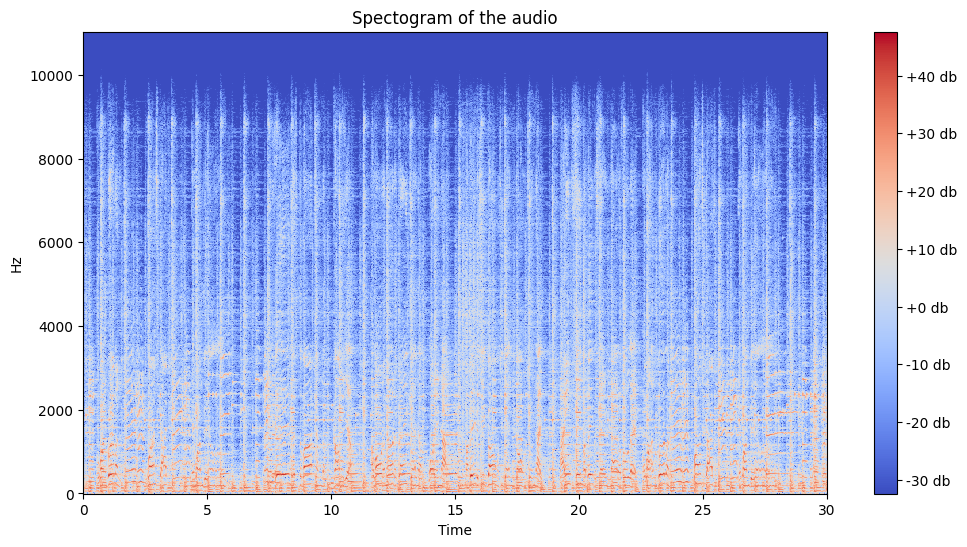

In [21]:
#Let load.wav file with default sampling rate of 22,050Hz
data, sr = librosa.load(data_path)

#Spectogram of the audio
stft=librosa.stft(data)
stft_db=librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(12, 6))
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='hz')
plt.title('Spectogram of the audio')
plt.colorbar(format='%+2.0f db')

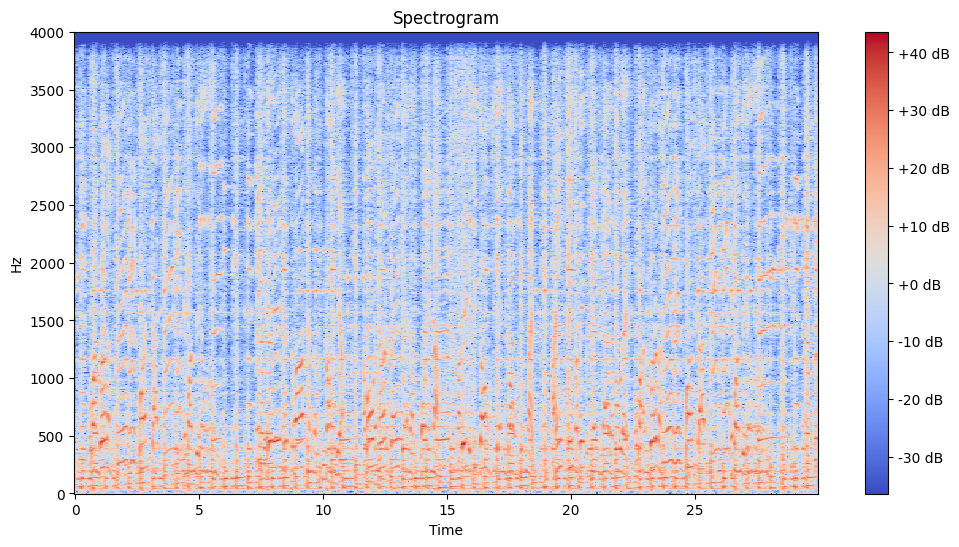

In [22]:
# Let load .wav file with default sampling rate of 8000Hz
data, sr = librosa.load(data_path, sr=8000)

# Spectrogram of the audio
stft=librosa.stft(data)
stft_db=librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(12,6))
librosa.display.specshow(stft_db,sr=sr,x_axis='time',y_axis='hz')
plt.title('Spectrogram')
plt.colorbar(format='%+2.0f dB')